In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action= 'ignore')

In [30]:
tips = sns.load_dataset('tips')
df = tips.copy()
df.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [32]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [33]:
dms = pd.get_dummies(df[['sex', 'smoker', 'day', 'time']])
dms.head()

,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,0,1,0,1,0,0,0,1,0,1
1,1,0,0,1,0,0,0,1,0,1
2,1,0,0,1,0,0,0,1,0,1
3,1,0,0,1,0,0,0,1,0,1
4,0,1,0,1,0,0,0,1,0,1


In [34]:
# Bagimli degisken
y = df['total_bill']

In [35]:
X_ = df.drop(['sex', 'smoker', 'day', 'time'], axis= 1).astype('float64')
X_.head()

,total_bill,tip,size
0,16.99,1.01,2.0
1,10.34,1.66,3.0
2,21.01,3.50,3.0
3,23.68,3.31,2.0
4,24.59,3.61,4.0


In [54]:
# Bagimsiz Degiskenler olusturuldu
X = pd.concat([X_, dms[['sex_Male', 'smoker_Yes', 'day_Fri','day_Sat', 'day_Sun', 'time_Dinner']]], axis= 1)
X.head()

,total_bill,tip,size,sex_Male,smoker_Yes,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,1.01,2.0,0,0,0,0,1,1
1,10.34,1.66,3.0,1,0,0,0,1,1
2,21.01,3.50,3.0,1,0,0,0,1,1
3,23.68,3.31,2.0,1,0,0,0,1,1
4,24.59,3.61,4.0,0,0,0,0,1,1


In [73]:
# Kutuphaneler import edilir
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from sklearn import model_selection

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size= 0.20, 
                                                    random_state=144) 
print('X_train', X_train.shape)
print('y_train', y_train.shape)

print('X_test', X_test.shape)
print('y_test', y_test.shape)

training = df.copy()

print('Training', training.shape)

X_train (195, 9)
y_train (195,)
X_test (49, 9)
y_test (49,)
Training (244, 7)


In [60]:
# X_reduced_train = indirgenmis x degerleri 
pca = PCA()

X_reduced_train = pca.fit_transform(scale(X_train))
X_reduced_train[0:1]

array([[-0.72937753,  1.05852898, -1.0440633 , -1.12644764,  1.07297429,
         0.59390692,  0.63057211, -0.06403388,  0.02919208]])

In [61]:
np.cumsum(pca.explained_variance_ratio_)

array([0.27193988, 0.45062827, 0.60608215, 0.73661484, 0.8342496 ,
       0.91207964, 0.96810793, 0.99697519, 1.        ])

In [63]:
# 244 Degiskeni 9 degiskenle aciklayabilmisiz demektir
np.cumsum(pca.explained_variance_ratio_).shape

(9,)

In [64]:
# Varyansa Bakalim
# 9. degiskene geldigimizde modeli 99.99% aciklayabilmisiz demektir
np.cumsum(np.round(pca.explained_variance_ratio_, decimals= 4 )*100)

array([27.19, 45.06, 60.61, 73.66, 83.42, 91.2 , 96.8 , 99.69, 99.99])

In [67]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train, y_train)

# Modelin sabiti
print(pcr_model.intercept_)

# Modelin katsayilari (9 tane katsayi geldi)
print(pcr_model.coef_)

20.324717948717947
[ 4.87866673  1.28503306  2.58170838 -0.2748108  -0.32117955 -0.61141924
  0.7516942   7.12908955  0.3282949 ]


In [68]:
y_pred = pcr_model.predict(X_reduced_train)
y_pred[0:5]

array([15.06, 13.28, 10.59, 43.11, 35.83])

In [69]:
# Train seti Hatasi (RMSE)
np.sqrt(mean_squared_error(y_train, y_pred))

7.968578673114607e-15

In [70]:
# Orjinal DataFrame icindeki Salary ortalamasi 535, hata 289 ???
df['total_bill'].mean()

19.785942622950824

In [71]:
# R-Squared
r2_score(y_train, y_pred)

1.0

In [72]:
pca2 = PCA()

X_reduced_test = pca2.fit_transform(scale(X_test))

# X_test uzerinden tahmin degerleri
y_pred = pcr_model.predict(X_reduced_test)

# Test Hatasini Hesaplama
print(np.sqrt(mean_squared_error(y_test, y_pred)))

7.461395692679113


In [87]:
# n_splits = 10 (10 katli yapiyoruz)
# shuffle = Gruplara ayrilmadan once verilerin karistirilip karistirmayacagi 

cv_10 = model_selection.KFold(n_splits= 10,
                             shuffle= True,
                             random_state= 1)
cv_10

KFold(n_splits=10, random_state=1, shuffle=True)

In [88]:
lm = LinearRegression()

RMSE = []

for i in np.arange(1, X_reduced_train.shape[1]+1):
    
    score = np.sqrt(-model_selection.cross_val_score(lm,
                                                     X_reduced_train[:,:i],
                                                     y_train.ravel(),
                                                     cv= cv_10,
                                                     scoring= 'neg_mean_squared_error').mean())
    RMSE.append(score)
    
RMSE[0]

5.156848624165999

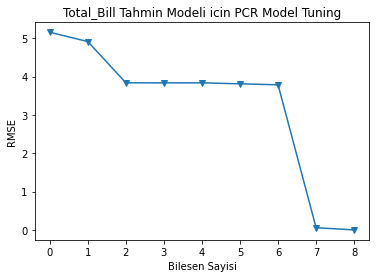

In [89]:
plt.plot(RMSE, '-v')
plt.xlabel('Bilesen Sayisi')
plt.ylabel('RMSE')
plt.title('Total_Bill Tahmin Modeli icin PCR Model Tuning');

# Optimum Bilesen Sayisi  6 oldugunu anliyoruz !!!!!

In [94]:
# Optimum Deger uzerinden Train Hatasi Hesaplamak

lm = LinearRegression()

pcr_model = lm.fit(X_reduced_train[:,0:9], y_train)

y_pred = pcr_model.predict(X_reduced_train[:,0:9])

print('Optimium Deger Train Hatasi = ',np.sqrt(mean_squared_error(y_train, y_pred)))

# Optimum Deger uzerinden TEST Hatasi Hesaplamak

y_pred = pcr_model.predict(X_reduced_test[:,0:9])

print('Optimum Deger TEST Hatasi = ',np.sqrt(mean_squared_error(y_test, y_pred)))

Optimium Deger Train Hatasi =  7.968578673114607e-15
Optimum Deger TEST Hatasi =  7.461395692679113


In [46]:
# model.score = R_square
model.score(X_train, y_train)

1.0

In [47]:
cross_val_score(model, X, y, cv= 10, scoring='r2')

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [48]:
cross_val_score(model, X, y, cv= 10, scoring='r2').mean()

1.0

In [49]:
cross_val_score(model, 
                X_train, 
                y_train, 
                cv= 10, 
                scoring='neg_mean_squared_error')

array([-9.15078650e-30, -2.00370670e-29, -4.54383881e-29, -0.00000000e+00,
       -1.14384831e-30, -2.70703847e-29, -1.00974196e-28, -3.19281072e-29,
       -1.16253186e-30, -2.74025367e-29])

In [51]:
np.sqrt(-cross_val_score(model, 
                X_train, 
                y_train, 
                cv= 10, 
                scoring='neg_mean_squared_error')).mean()

4.252657330330453e-15

In [52]:
cross_val_score(model, X_test, y_test, cv=10,scoring='r2').mean()

1.0

In [53]:
np.sqrt(-cross_val_score(model,
                        X_test,
                        y_test,
                        cv=10,
                        scoring='neg_mean_squared_error')).mean()

4.15939117421659e-15